# Flight Price Prediction

This is project is about predicting the price of a flight based on the features of the flight. We are going to use a dataset from `/data` and train a model to predict the price of a flight.

## 1. Load and explore the dataset

In [68]:
import pandas as pd

df = pd.read_csv('data/flight_dataset.csv')

print(f"L'ensemble des données contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

print(f"Les 5 premières lignes du dataset sont : \n{df.head()}")

print(f"Les 5 dernières lignes du dataset sont : \n{df.tail()}")

print(f"Les colonnes du dataset sont : \n{df.columns}")

L'ensemble des données contient 10683 lignes et 14 colonnes
Les 5 premières lignes du dataset sont : 
       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi            0   3897    24      3  2019   
1    Air India   Kolkata    Banglore            2   7662     1      5  2019   
2  Jet Airways     Delhi      Cochin            2  13882     9      6  2019   
3       IndiGo   Kolkata    Banglore            1   6218    12      5  2019   
4       IndiGo  Banglore   New Delhi            1  13302     1      3  2019   

   Dep_hours  Dep_min  Arrival_hours  Arrival_min  Duration_hours  \
0         22       20              1           10               2   
1          5       50             13           15               7   
2          9       25              4           25              19   
3         18        5             23           30               5   
4         16       50             21           35               4   

   Durat

We can see here that the format of the date is separated by columns with the number of the day, month and year.

In [69]:
print(f"The unique values of the column 'Airline' are : {df['Airline'].unique()}")

print(f"The unique values of the column 'Source' are : {df['Source'].unique()}")

print(f"The unique values of the column 'Destination' are : {df['Destination'].unique()}")

The unique values of the column 'Airline' are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The unique values of the column 'Source' are : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
The unique values of the column 'Destination' are : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


## 2. Preprocessing

In [70]:
nb_null_values_line = df.isnull().any(axis=1).sum()
print(f"The number of lines with null values is {nb_null_values_line}")

if nb_null_values_line > 0:
    df = df.dropna()
    print(f"Deleting the lines with null values")
    

df["Duration_total_min"] = df["Duration_hours"] * 60 + df["Duration_min"]

model_df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)

print(model_df.head())

The number of lines with null values is 0
   Total_Stops  Price  Date  Month  Year  Dep_hours  Dep_min  Arrival_hours  \
0            0   3897    24      3  2019         22       20              1   
1            2   7662     1      5  2019          5       50             13   
2            2  13882     9      6  2019          9       25              4   
3            1   6218    12      5  2019         18        5             23   
4            1  13302     1      3  2019         16       50             21   

   Arrival_min  Duration_hours  ...  Airline_Vistara Premium economy  \
0           10               2  ...                            False   
1           15               7  ...                            False   
2           25              19  ...                            False   
3           30               5  ...                            False   
4           35               4  ...                            False   

   Source_Chennai  Source_Delhi  Source_Kolkata  S

We converted the duration in minutes and we created a new column with the total duration in minutes. All categorical variables are converted into dummy variables with the One Hot Encoding.

## 3. Exploratory Data Analysis (EDA)

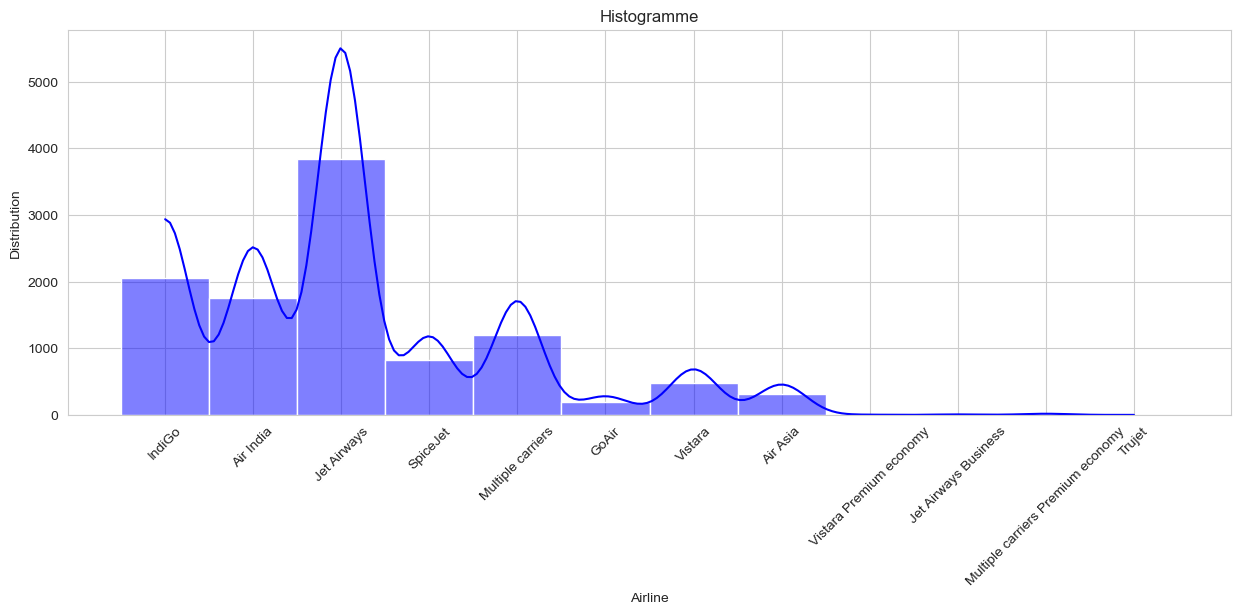

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.histplot(df["Airline"], kde=True, color="blue")
plt.title("Histogramme")
plt.xlabel("Airline")
plt.ylabel("Distribution")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


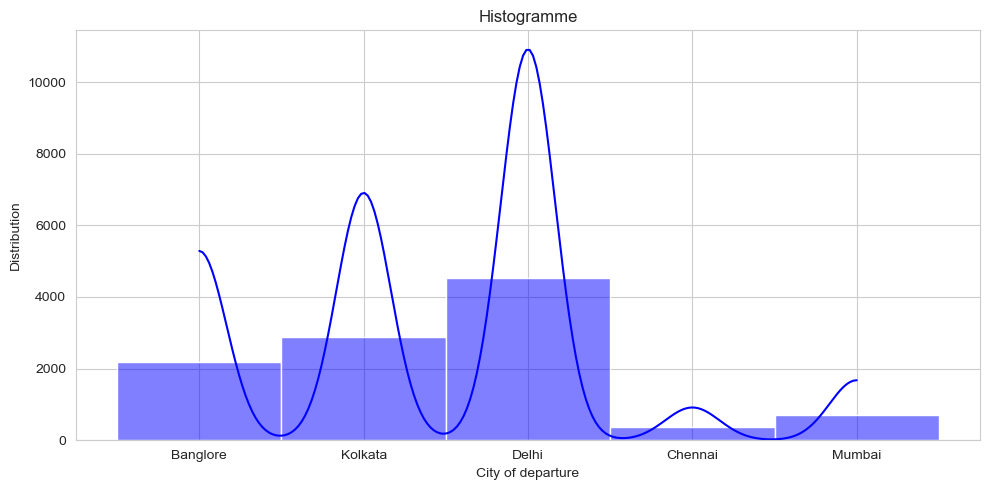

In [72]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Source"], kde=True, color="blue")
plt.title("Histogramme")
plt.xlabel("City of departure")
plt.ylabel("Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

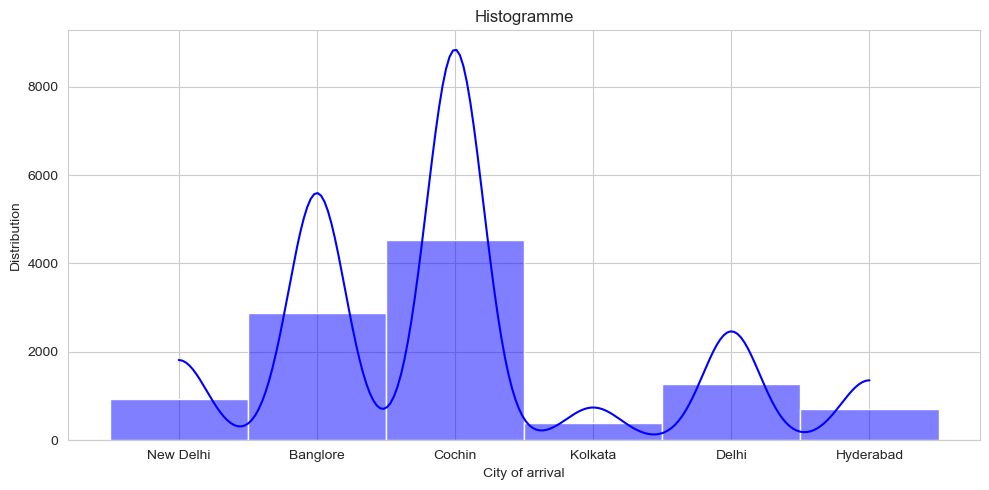

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Destination"], kde=True, color="blue")
plt.title("Histogramme")
plt.xlabel("City of arrival")
plt.ylabel("Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

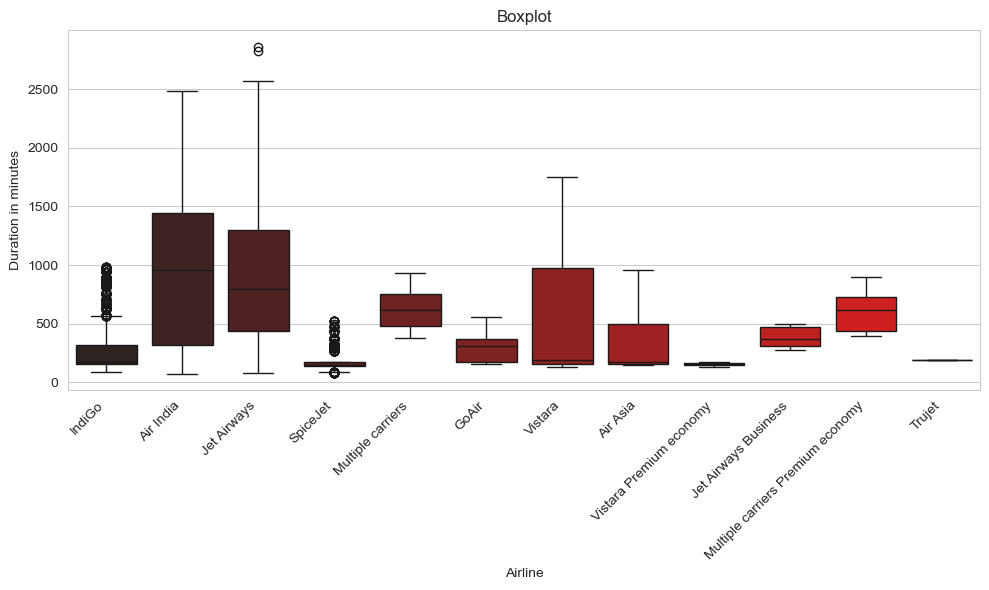

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Duration_total_min', data=df, palette='dark:red', hue='Airline', legend=False)
plt.title("Boxplot")
plt.xlabel("Airline")
plt.ylabel("Duration in minutes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

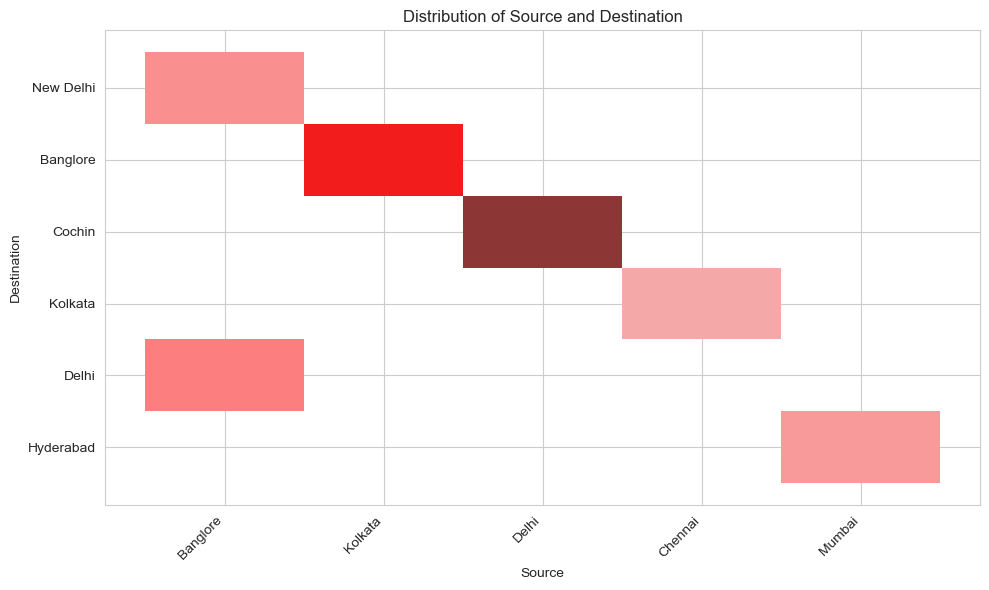

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Source', y="Destination", data=df, color="red")
plt.title("Distribution of Source and Destination")
plt.xlabel("Source")
plt.ylabel("Destination")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

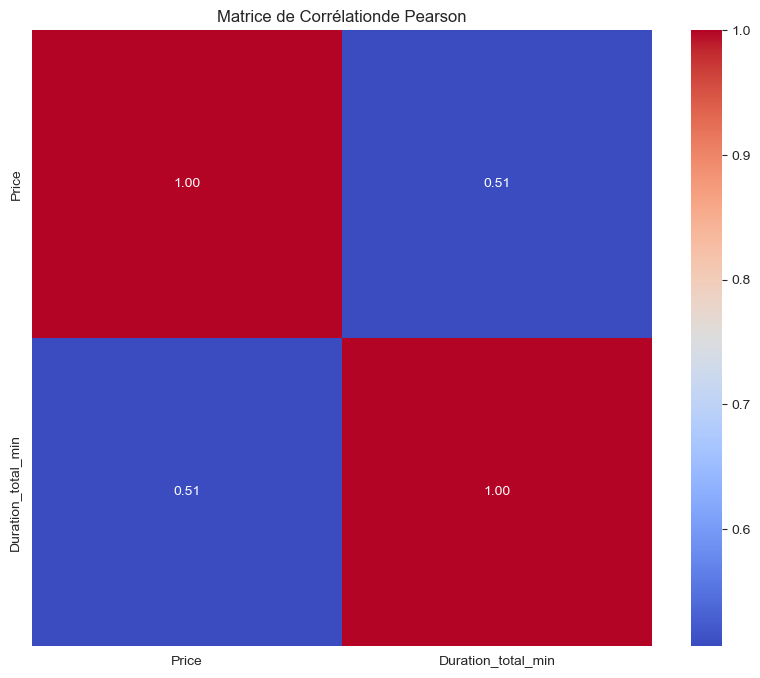

In [83]:
correlation_matrix = df[["Price", "Duration_total_min"]].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélationde Pearson")
plt.show()

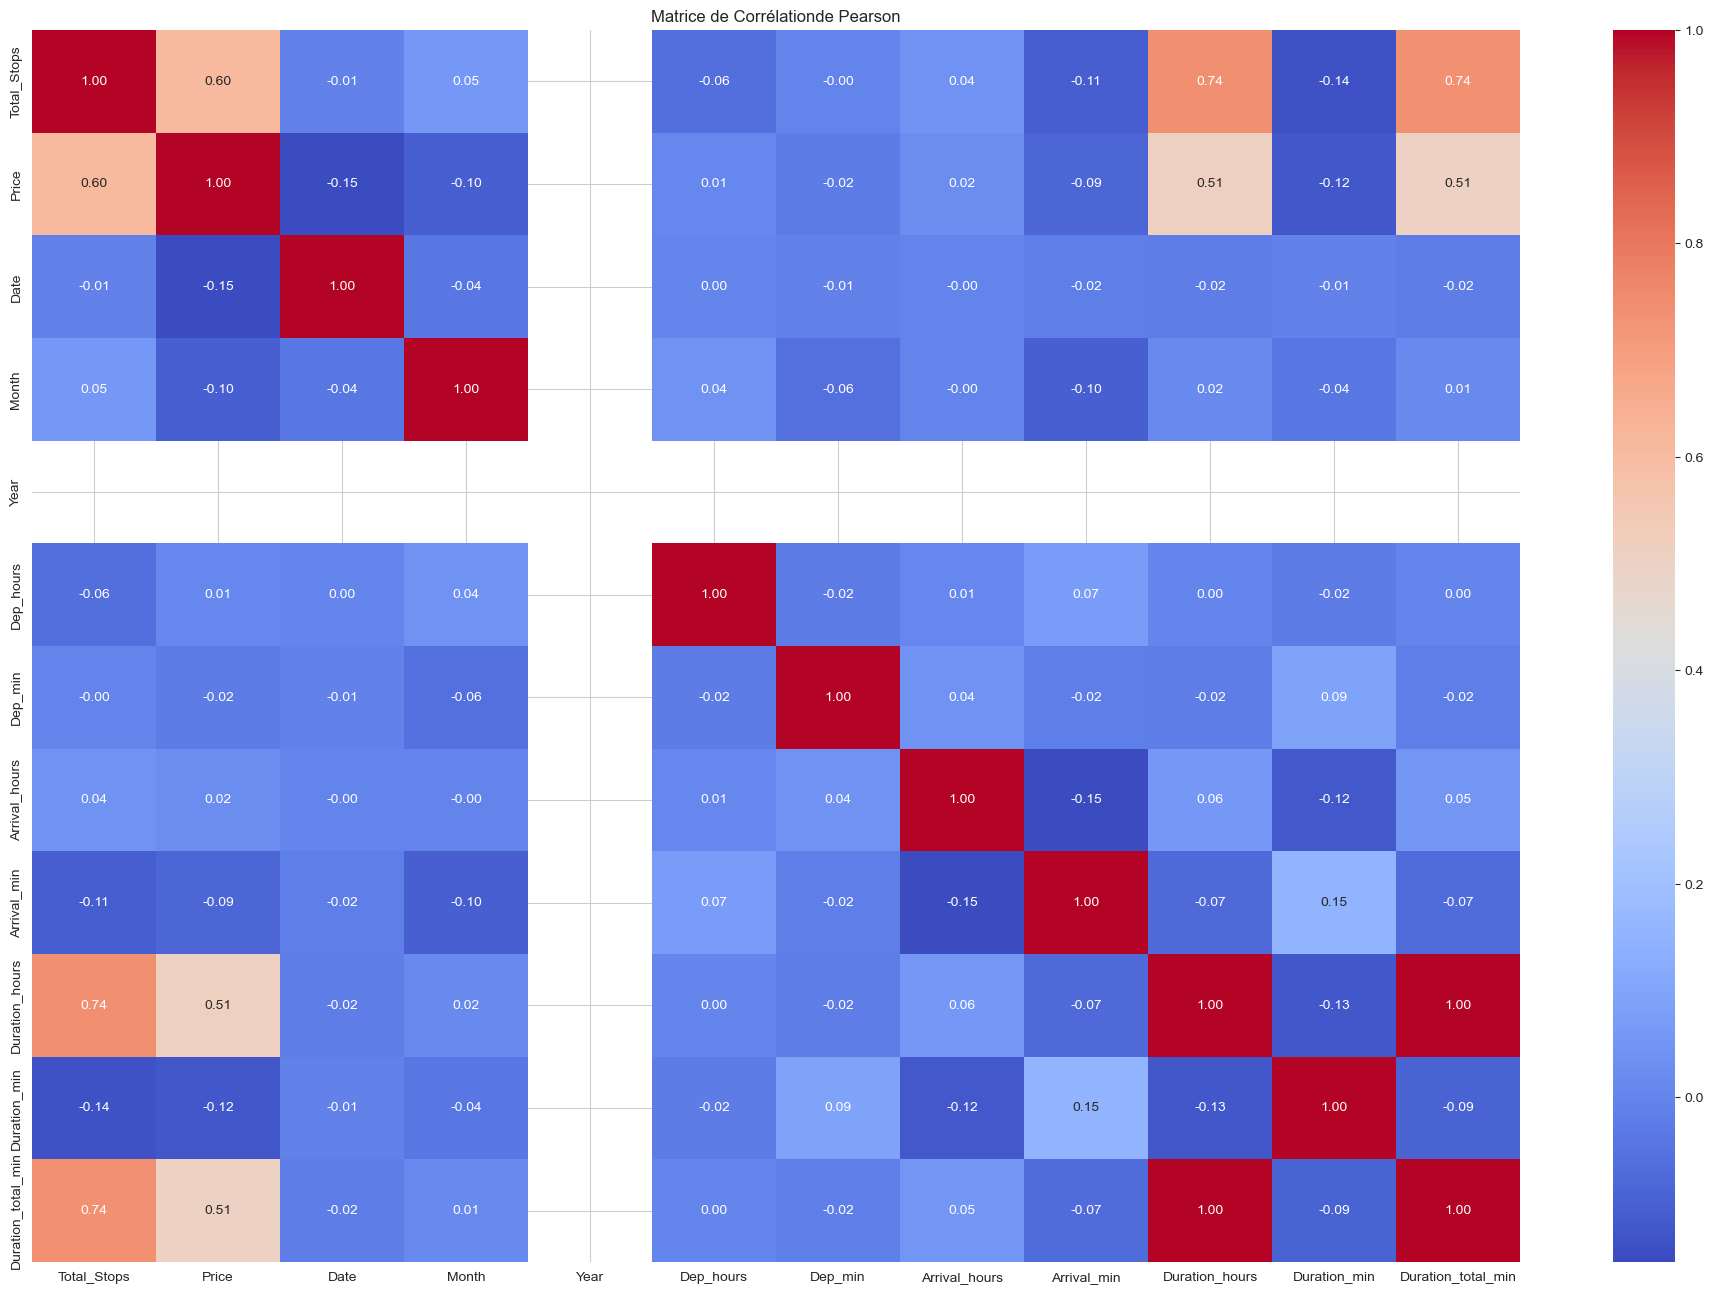

In [86]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélationde Pearson")
plt.show()

There is a correlation between the price and the duration of the flight, the total stops and the duration of the flight and the price.

In [64]:
print(f"The average of stop is {df['Total_Stops'].mean().round(2)}")
print(f"The median of stop is {df['Total_Stops'].median()}")
print(f"The minimum of stop is {df['Total_Stops'].min()}")
print(f"The maximum of stop is {df['Total_Stops'].max()}")

print("--------------------------------")

print(f"The average of price is {df['Price'].mean().round(2)}")
print(f"The median of price is {df['Price'].median()}")
print(f"The minimum of price is {df['Price'].min()}")
print(f"The maximum of price is {df['Price'].max()}")

print("--------------------------------")

print(f"The average of duration in minutes is {df['Duration_total_min'].mean().round(2)}")
print(f"The median of duration in minutes is {df['Duration_total_min'].median()}")
print(f"The minimum of duration in minutes is {df['Duration_total_min'].min()}")
print(f"The maximum of duration in minutes is {df['Duration_total_min'].max()}")


The average of stop is 0.82
The median of stop is 1.0
The minimum of stop is 0
The maximum of stop is 4
--------------------------------
The average of price is 9087.06
The median of price is 8372.0
The minimum of price is 1759
The maximum of price is 79512
--------------------------------
The average of duration in minutes is 643.12
The median of duration in minutes is 520.0
The minimum of duration in minutes is 75
The maximum of duration in minutes is 2860


## 4. Chose and train several models

## 5. Evaluation of performance

## 6. Compare and select the best model